In [1]:
# tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import load_model
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

In [3]:
import tensorflow as tf

# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'divided_dataset\\train_dataset',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'divided_dataset\\test_dataset',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

In [ ]:
train_ds_1 = train_ds
validation_ds_1 = validation_ds

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

(160, 160, 3)


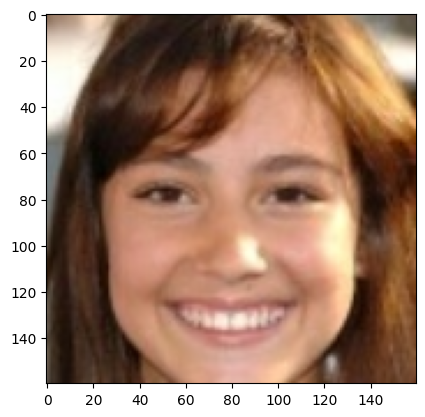

In [ ]:
import matplotlib.pyplot as plt
for i, j in train_ds.take(1):
    print(i[1].shape)
    image = i[1]
    plt.imshow(image)
    plt.show()

In [ ]:
model_for_simba = tf.keras.models.load_model("final_model")

1/1 [==============================] - 5s 5s/step


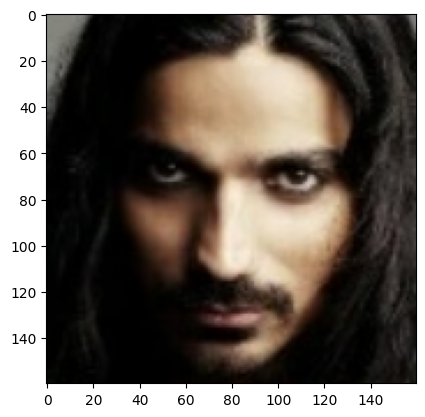

True Label: 8957
Predicted Label: 8957, Confidence: 0.9273422360420227


In [ ]:
for images, labels in validation_ds.take(1):
    input_image = images[0]
    true_label = labels[0]
    true_label_index = np.argmax(true_label)
    prediction = model_for_simba.predict(np.expand_dims(input_image, axis=0))
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)
    plt.imshow(input_image)
    plt.show()
    print(f"True Label: {true_label_index}")
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}")

In [ ]:
# class_index = validation_ds_1.class_names.index('000011')
# class_index

In [ ]:
label_list = [18,23,41,5177,8715]
list_of_list=[]
list_18 =[]
list_23 =[]
list_41 =[]
list_5177 = []
list_8715 = []
for images, labels in validation_ds:
    # Filter images that belong to the specified class
    for i in range(len(labels)):
        label_index = tf.argmax(labels[i]).numpy()
        if label_index == 18:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_18.append(images[i].numpy())
        elif label_index == 23:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_23.append(images[i].numpy())
        elif label_index == 41:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_41.append(images[i].numpy())                

        elif label_index == 5177:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_5177.append(images[i].numpy())

        elif label_index == 8715:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_8715.append(images[i].numpy())

V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 16ms/step
H
V
1/1 [==============================] - 0s 27ms/step
H
V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 16ms/step
H
V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 32ms/step
H
V
1/1 [==============================] - 0s 27ms/step
H
V
1/1 [==============================] - 0s 28ms/step
H
V
1/1 [==============================] - 0s 20ms/step
H
V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 25ms/step
H
V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 16ms/step
H
V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 26ms

In [ ]:
class_18_size = len(list_18)
class_23_size = len(list_23)
class_41_size = len(list_41)
class_5177_size = len(list_5177)
class_8715_size = len(list_8715)

print(f"Class 18: {class_18_size}")
print(f"Class 23: {class_23_size}")
print(f"Class 41: {class_41_size}")
print(f"Class 5177: {class_5177_size}")
print(f"Class 8715: {class_8715_size}")

Class 18: 67
Class 23: 86
Class 41: 82
Class 5177: 34
Class 8715: 19


In [ ]:
type(list_18[0])

numpy.ndarray

In [ ]:
class_18 = np.array(list_18)
class_23 = np.array(list_23)
class_41 = np.array(list_41)
class_5177 = np.array(list_5177)
class_8715 = np.array(list_8715)

In [ ]:
target_class = 38

In [ ]:
# Create the target vector (one-hot encoded)
num_samples_1 = class_8715.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target_1 = np.zeros((num_samples_1, num_classes)) # for class 8715 (19 images)
y_target_1[:, target_class] = 1

In [ ]:
# Create the target vector (one-hot encoded)
num_samples_2 = class_5177.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target_2 = np.zeros((num_samples_2, num_classes)) # for class 5177 (34 images)
y_target_2[:, target_class] = 1

In [ ]:
# Create the target vector (one-hot encoded)
num_samples_3 = class_18.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target_3 = np.zeros((num_samples_3, num_classes)) # for class 18 (67 images)
y_target_3[:, target_class] = 1

In [ ]:
# Create the target vector (one-hot encoded)
num_samples_4 = class_41.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target_4 = np.zeros((num_samples_4, num_classes)) # for class 41 (82 images)
y_target_4[:, target_class] = 1

In [ ]:
# Create the target vector (one-hot encoded)
num_samples_5 = class_23.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target_5 = np.zeros((num_samples_5, num_classes)) # for class 23 (86 images)
y_target_5[:, target_class] = 1

In [ ]:
print(type(y_target_1[0]))
print(np.argmax(y_target_1[7]))


<class 'numpy.ndarray'>
38


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
from art.estimators.classification import TensorFlowV2Classifier

classifier = TensorFlowV2Classifier(
    model=model_for_simba,
    loss_object=loss_object,
    input_shape=(160, 160, 3),
    nb_classes=10572,
    optimizer=optimizer,
    )

c:\ProgramData\anaconda3\envs\tensorflowgpu\lib\site-packages\art\estimators\certification\__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [ ]:
from art.attacks.evasion import SimBA

simba = SimBA(
    classifier=classifier,
    attack='dct',  # or 'px' for pixel attack
    max_iter=3000,
    epsilon=0.1,
    order='random',
    freq_dim=4,
    stride=2,
    targeted=True,
    batch_size=1,
    verbose=True
)

In [ ]:
adversarial_images_class_8715 = simba.generate(x=class_8715, y=y_target_1)

SimBA - sample:   0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
adversarial_images_class_5177 = simba.generate(x=class_5177, y=y_target_2)

SimBA - sample:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
adversarial_images_class_18 = simba.generate(x=class_18, y=y_target_3)

SimBA - sample:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
adversarial_images_class_41 = simba.generate(x=class_41, y=y_target_4)

SimBA - sample:   0%|          | 0/82 [00:00<?, ?it/s]

In [ ]:
adversarial_images_class_23 = simba.generate(x=class_23, y=y_target_5)

SimBA - sample:   0%|          | 0/86 [00:00<?, ?it/s]

In [ ]:
adversarial_images_class_8715.shape[0]

19

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, title, class_size):
    fig, axes = plt.subplots(1, class_size, figsize=(20, 2))
    fig.suptitle(title, fontsize=16)
    for i in range(class_size):
        ax = axes[i]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(labels[i])
    plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original_images, adversarial_images, win_size=11, data_range=1.0):
    ssim_values = []
    for original, adversarial in zip(original_images, adversarial_images):
        ssim_value, _ = ssim(original, adversarial, win_size=win_size, multichannel=True, channel_axis=-1, full=True, data_range=data_range)
        ssim_values.append(ssim_value)
    return np.mean(ssim_values)


1/1 [==============================] - 0s 36ms/step


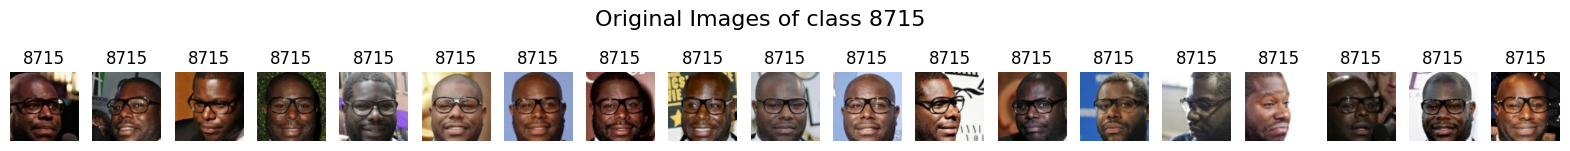

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04886842..1.0347275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02724285..0.963269].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.066870965..1.0145679].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.031454563..0.86376077].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0038488058..1.0183438].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.012740844..1.0377884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range

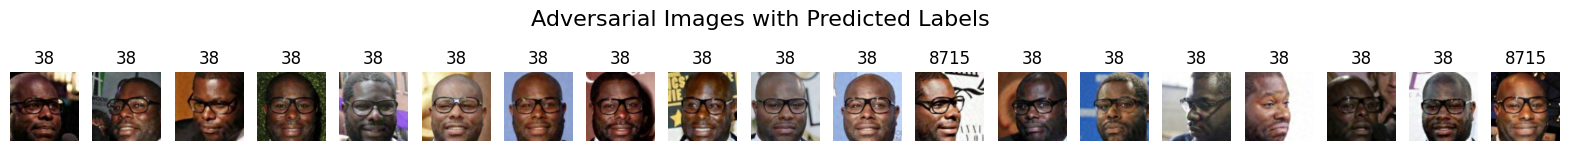

Average SSIM for class 8715: 0.9643613696098328


In [ ]:
# Plot original images with their true labels
original_labels_8715 = np.argmax(model_for_simba.predict(class_8715), axis=1)
plot_images(class_8715, original_labels_8715, 'Original Images of class 8715', class_8715_size)

# Plot adversarial images with their predicted labels
adversarial_labels_8715 = np.argmax(classifier.predict(adversarial_images_class_8715), axis=1)
plot_images(adversarial_images_class_8715, adversarial_labels_8715, 'Adversarial Images with Predicted Labels', class_8715_size)

average_ssim_8715= calculate_ssim(class_8715, adversarial_images_class_8715, win_size=11, data_range=1.0)
print(f"Average SSIM for class 8715: {average_ssim_8715}")

In [ ]:
print(len(adversarial_images_class_5177))

34


2/2 [==============================] - 0s 271ms/step


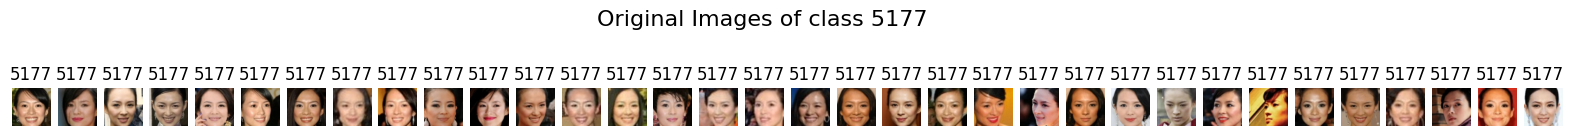

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02463568..1.0547632].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020422373..0.883801].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00016051624..1.0380654].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.027396003..0.93119806].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01850264..0.99963224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02397345..1.0413947].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

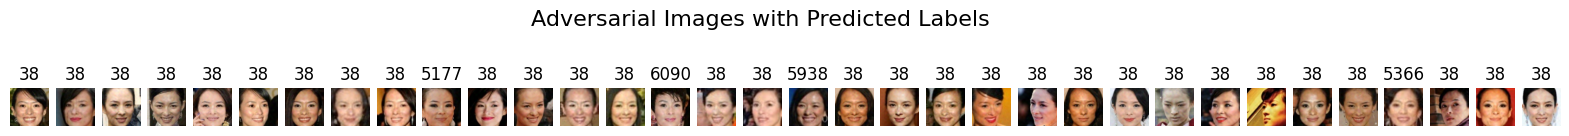

Average SSIM: 0.9681560397148132


In [ ]:
# Plot original images with their true labels
original_labels_5177 = np.argmax(model_for_simba.predict(class_5177), axis=1)
plot_images(class_5177, original_labels_5177, 'Original Images of class 5177', class_5177_size)

# Plot adversarial images with their predicted labels
adversarial_labels_5177 = np.argmax(classifier.predict(adversarial_images_class_5177), axis=1)
plot_images(adversarial_images_class_5177, adversarial_labels_5177, 'Adversarial Images with Predicted Labels' , class_5177_size)

average_ssim_5177 = calculate_ssim(class_5177, adversarial_images_class_5177, win_size=11, data_range=1.0)
print(f"Average SSIM: {average_ssim_5177}")

3/3 [==============================] - 0s 168ms/step


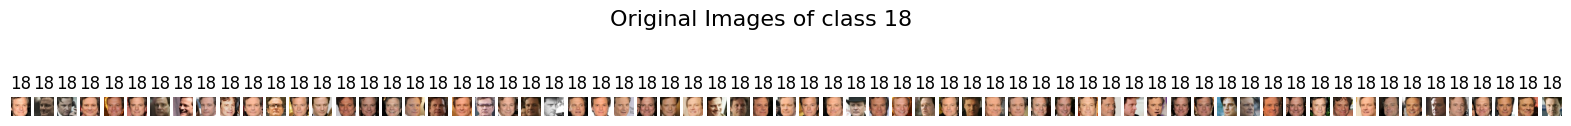

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028024482..1.0303237].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008415156..1.0096045].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022343334..1.0161566].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.016601231..1.0278782].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.048549797..1.0303469].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01115894..1.0219028].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range 

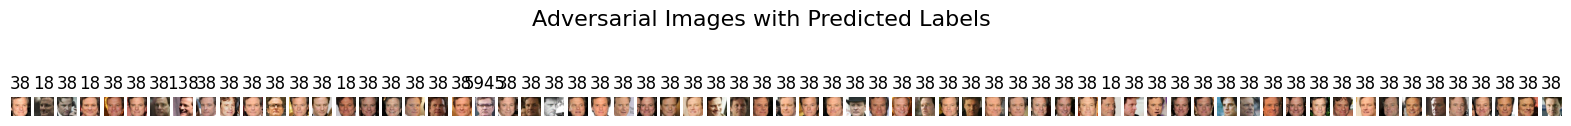

Average SSIM: 0.9744356274604797


In [ ]:
# Plot original images with their true labels
original_labels_18 = np.argmax(model_for_simba.predict(class_18), axis=1)
plot_images(class_18, original_labels_18, 'Original Images of class 18', class_18_size)

# Plot adversarial images with their predicted labels
adversarial_labels_18 = np.argmax(classifier.predict(adversarial_images_class_18), axis=1)
plot_images(adversarial_images_class_18, adversarial_labels_18, 'Adversarial Images with Predicted Labels' , class_18_size)

average_ssim_18 = calculate_ssim(class_18, adversarial_images_class_18, win_size=11, data_range=1.0)
print(f"Average SSIM: {average_ssim_18}")

3/3 [==============================] - 0s 190ms/step


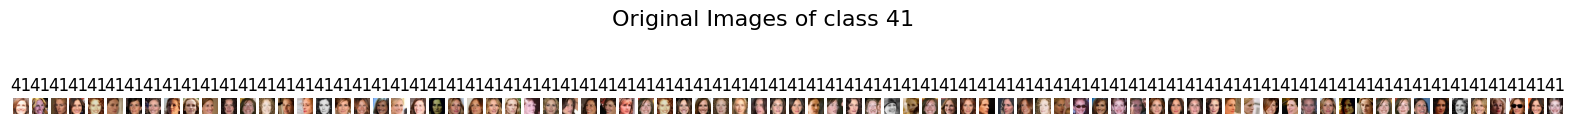

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.037136037..1.0850914].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.021307515..1.0136204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022227984..1.0268201].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029332375..0.95721483].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.026479306..0.8436631].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.019367259..0.9418198].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

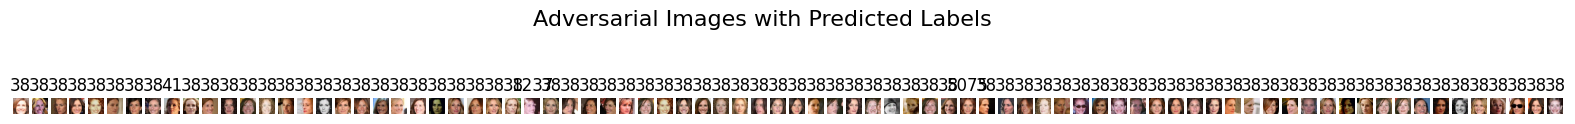

Average SSIM: 0.97743821144104


In [ ]:
# Plot original images with their true labels
original_labels_41= np.argmax(model_for_simba.predict(class_41), axis=1)
plot_images(class_41, original_labels_41, 'Original Images of class 41', class_41_size)

# Plot adversarial images with their predicted labels
adversarial_labels_41 = np.argmax(classifier.predict(adversarial_images_class_41), axis=1)
plot_images(adversarial_images_class_41, adversarial_labels_41, 'Adversarial Images with Predicted Labels' , class_41_size)

average_ssim_41 = calculate_ssim(class_41, adversarial_images_class_41, win_size=11, data_range=1.0)
print(f"Average SSIM: {average_ssim_41}")

3/3 [==============================] - 0s 213ms/step


IndexError: index 19 is out of bounds for axis 0 with size 19

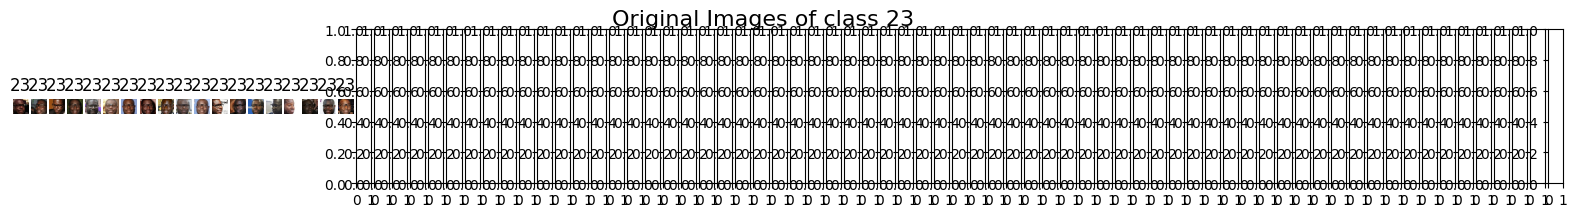

In [ ]:
# Plot original images with their true labels
original_labels_23= np.argmax(model_for_simba.predict(class_23), axis=1)
plot_images(class_23, original_labels_23, 'Original Images of class 23', class_23_size)

# Plot adversarial images with their predicted labels
adversarial_labels_23= np.argmax(classifier.predict(adversarial_images_class_23), axis=1)
plot_images(adversarial_images_class_23, adversarial_labels_23, 'Adversarial Images with Predicted Labels' , class_23_size)

average_ssim_23 = calculate_ssim(class_23, adversarial_images_class_23, win_size=11, data_range=1.0)
print(f"Average SSIM: {average_ssim_23}")

Sample of Attack on class 8715 ==> class 38

1/1 [==============================] - 0s 29ms/step


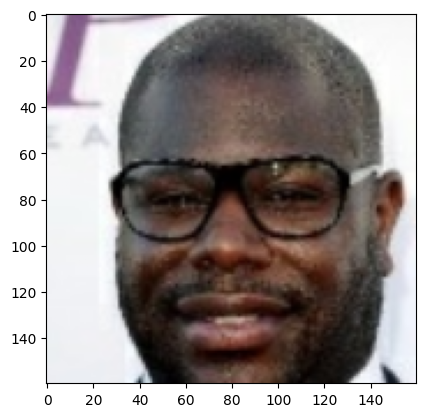

Predicted Label before attack: 8715, Confidence Score before attack: 0.9996528625488281
1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.031858616..1.0184704].


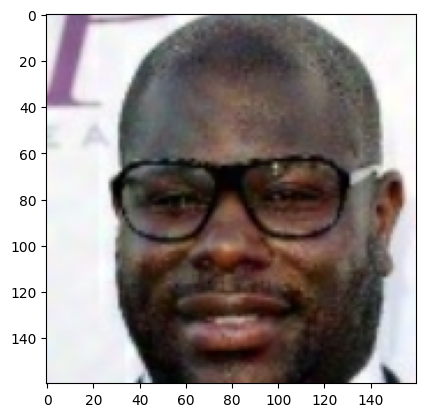

Predicted Label after attack: 38, Confidence score after attack: 0.22604712843894958


In [ ]:
prediction_class_8715 = model_for_simba.predict(np.expand_dims(class_8715[17], axis=0))
predicted_label_class_8715 = np.argmax(prediction_class_8715)
predicted_label_class_8715
plt.imshow(class_8715[17])
plt.show()
confidence_class_8715 = np.max(prediction_class_8715)
print(f"Predicted Label before attack: {predicted_label_class_8715}, Confidence Score before attack: {confidence_class_8715}")


attacked_prediction_class_8715 = model_for_simba.predict(np.expand_dims(adversarial_images_class_8715[17], axis=0))
attacked_predicted_label_class_8715 = np.argmax(attacked_prediction_class_8715)
attacked_predicted_label_class_8715
plt.imshow(adversarial_images_class_8715[17])
plt.show()
attacked_confidence_class_8715 = np.max(attacked_prediction_class_8715)
print(f"Predicted Label after attack: {attacked_predicted_label_class_8715}, Confidence score after attack: {attacked_confidence_class_8715}")

1/1 [==============================] - 0s 31ms/step


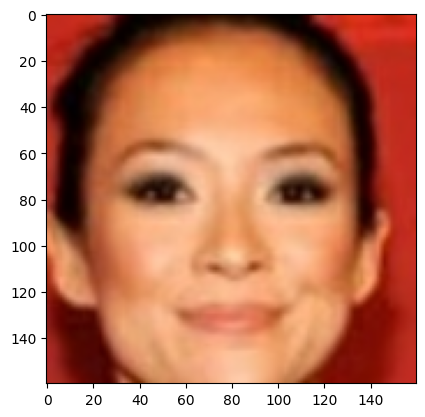

Predicted Label before attack: 5177, Confidence Score before attack: 0.9970548152923584
1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024778472..1.0525573].


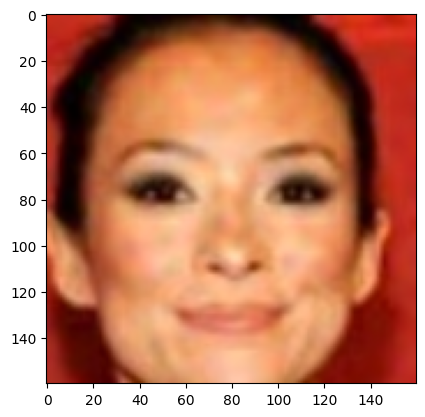

Predicted Label after attack: 38, Confidence score after attack: 0.17688006162643433


In [ ]:
prediction_class_5177 = model_for_simba.predict(np.expand_dims(class_5177[32], axis=0))
predicted_label_class_5177 = np.argmax(prediction_class_5177)
predicted_label_class_5177
plt.imshow(class_5177[32])
plt.show()
confidence_class_5177 = np.max(prediction_class_5177)
print(f"Predicted Label before attack: {predicted_label_class_5177}, Confidence Score before attack: {confidence_class_5177}")


attacked_prediction_class_5177 = model_for_simba.predict(np.expand_dims(adversarial_images_class_5177[32], axis=0))
attacked_predicted_label_class_5177 = np.argmax(attacked_prediction_class_5177)
attacked_predicted_label_class_5177
plt.imshow(adversarial_images_class_5177[32])
plt.show()
attacked_confidence_class_5177 = np.max(attacked_prediction_class_5177)
print(f"Predicted Label after attack: {attacked_predicted_label_class_5177}, Confidence score after attack: {attacked_confidence_class_5177}")

1/1 [==============================] - 0s 30ms/step


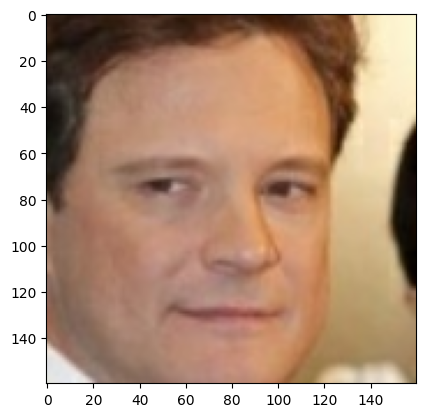

Predicted Label before attack: 18, Confidence Score before attack: 0.9996944665908813
1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.013980865..1.0142393].


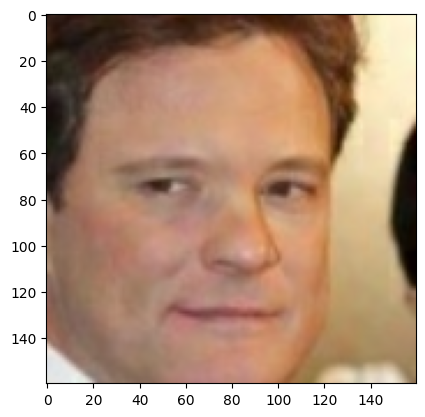

Predicted Label after attack: 38, Confidence score after attack: 0.19182324409484863


In [ ]:
prediction_class_18 = model_for_simba.predict(np.expand_dims(class_18[17], axis=0))
predicted_label_class_18 = np.argmax(prediction_class_18)
predicted_label_class_18
plt.imshow(class_18[17])
plt.show()
confidence_class_18 = np.max(prediction_class_18)
print(f"Predicted Label before attack: {predicted_label_class_18}, Confidence Score before attack: {confidence_class_18}")


attacked_prediction_class_18 = model_for_simba.predict(np.expand_dims(adversarial_images_class_18[17], axis=0))
attacked_predicted_label_class_18 = np.argmax(attacked_prediction_class_18)
attacked_predicted_label_class_18
plt.imshow(adversarial_images_class_18[17])
plt.show()
attacked_confidence_class_18 = np.max(attacked_prediction_class_18)
print(f"Predicted Label after attack: {attacked_predicted_label_class_18}, Confidence score after attack: {attacked_confidence_class_18}")

1/1 [==============================] - 0s 27ms/step


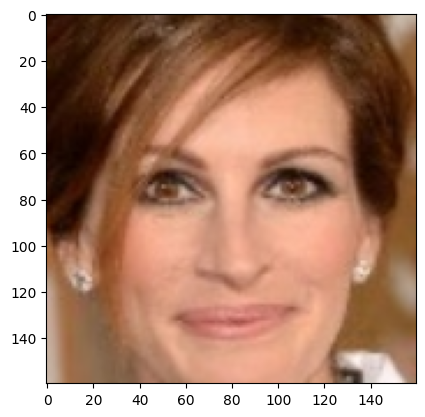

Predicted Label before attack: 41, Confidence Score before attack: 0.9816901087760925
1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022612669..1.0285934].


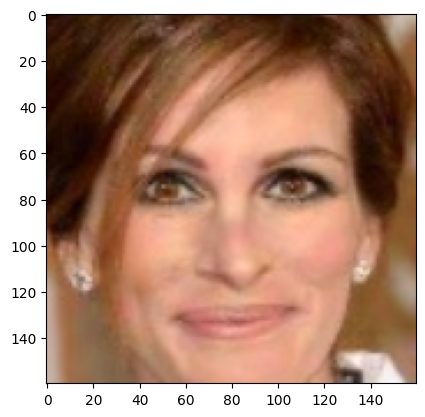

Predicted Label after attack: 38, Confidence score after attack: 0.12461607903242111


In [ ]:
prediction_class_41 = model_for_simba.predict(np.expand_dims(class_41[17], axis=0))
predicted_label_class_41 = np.argmax(prediction_class_41)
predicted_label_class_41
plt.imshow(class_41[17])
plt.show()
confidence_class_41 = np.max(prediction_class_41)
print(f"Predicted Label before attack: {predicted_label_class_41}, Confidence Score before attack: {confidence_class_41}")


attacked_prediction_class_41 = model_for_simba.predict(np.expand_dims(adversarial_images_class_41[17], axis=0))
attacked_predicted_label_class_41 = np.argmax(attacked_prediction_class_41)
attacked_predicted_label_class_41
plt.imshow(adversarial_images_class_41[17])
plt.show()
attacked_confidence_class_41 = np.max(attacked_prediction_class_41)
print(f"Predicted Label after attack: {attacked_predicted_label_class_41}, Confidence score after attack: {attacked_confidence_class_41}")

In [ ]:
prediction_class_23 = model_for_simba.predict(np.expand_dims(class_23[17], axis=0))
predicted_label_class_23 = np.argmax(prediction_class_23)
predicted_label_class_23
plt.imshow(class_23[17])
plt.show()
confidence_class_23 = np.max(prediction_class_23)
print(f"Predicted Label before attack: {predicted_label_class_23}, Confidence Score before attack: {confidence_class_23}")


attacked_prediction_class_23 = model_for_simba.predict(np.expand_dims(adversarial_images_class_23[17], axis=0))
attacked_predicted_label_class_23 = np.argmax(attacked_prediction_class_23)
attacked_predicted_label_class_23
plt.imshow(adversarial_images_class_23[17])
plt.show()
attacked_confidence_class_23 = np.max(attacked_prediction_class_23)
print(f"Predicted Label after attack: {attacked_predicted_label_class_23}, Confidence score after attack: {attacked_confidence_class_23}")